# K-Means

## Import libraries

Usei numpy para contas matemáticas, pandas para criar o dataframe e matplotlib + seaborn para plotar os gráficos.

In [1]:
#How to Create Pandas DataFrame in Python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Definição de funções:

In [2]:
def euclidiana_dis(X, center, num_center):
    """Calcula a distância euclidiana para o centro de entrada.
    Input: entrar com a array X e centro desejado.
    Ex: 03 clusters -> 03 centros: Calcular esta função para c0, depois para c1 e depois para c2"""
    dist=[]
    soma=0
    for i in range(len(X)):
        soma=0
        for j in range(len(X.loc[0,:])):
            soma = soma + (X.loc[i,j]-center[num_center][j])**2
        dist.append(np.sqrt(soma))
    return dist

In [3]:
def center_classification(dist_c1,dist_c2,dist_c3,dist_c4=0):
    a=[]
    if dist_c4==0:
        for i in range(len(dist_c2)):
            if ((dist_c1[i]<dist_c2[i])&(dist_c1[i]<dist_c3[i])):
                a.append('c1')
            if ((dist_c2[i]<dist_c1[i])&(dist_c2[i]<dist_c3[i])):
                a.append('c2')
            if ((dist_c3[i]<dist_c2[i])&(dist_c3[i]<dist_c1[i])):
                a.append('c3')
    if dist_c4!=0:
        for i in range(len(dist_c2)):
            if ((dist_c1[i]<dist_c2[i])&(dist_c1[i]<dist_c3[i])&(dist_c1[i]<dist_c4[i])):
                a.append('c1')
            if ((dist_c2[i]<dist_c1[i])&(dist_c2[i]<dist_c3[i])&(dist_c2[i]<dist_c4[i])):
                a.append('c2')
            if ((dist_c3[i]<dist_c2[i])&(dist_c3[i]<dist_c1[i])&(dist_c3[i]<dist_c4[i])):
                a.append('c3')
            if ((dist_c4[i]<dist_c1[i])&(dist_c4[i]<dist_c2[i])&(dist_c4[i]<dist_c3[i])):
                a.append('c4')            
    return a

In [4]:
def new_center(indices_c):
    """Função para cálculo do novo centro.
    Input = Lista com os índices do cluster correspondente
    Ex: linhas 0, 3 e 5 de X foram classificadas como c1.
    Input: indices_c = [7, 8, 9, 10]
    Output: c_novo = [4.78, 7.82]"""
    soma=0
    c_novo=[]
    for j in range(X.shape[1]):
        soma=0
        for i in indices_c:
            soma=soma+X.iloc[i,j]
        x_centro=soma/len(indices_c)
        x_centro=round(x_centro,2)
        c_novo.append(x_centro)
    return c_novo

## Exercício 01

Implementar o K-Means para o dataset de exemplo para 03 clusters.

In [5]:
#Inicialização do dataset
import pandas as pd
X = [[1.9, 7.3],
 [3.4, 7.5],
 [2.5, 6.8],
 [1.5, 6.5],
 [3.5, 6.4],
 [2.2, 5.8],
 [3.4, 5.2],
 [3.6, 4],
 [5, 3.2],
 [4.5, 2.4],
 [6, 2.6],
 [1.9, 3],
 [1, 2.7],
 [1.9, 2.4],
 [0.8, 2],
 [1.6, 1.8],
 [1, 1]]
X = pd.DataFrame(np.array(X), columns=[0,1])

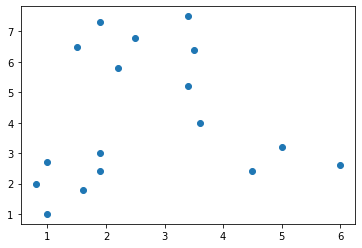

In [6]:
#Gráfico para ver a distribuição dos pontos
plt.scatter(X.loc[:,0],X.loc[:,1]);

In [7]:
#Inicialização dos centros de maneira aleatória (valores aproximados pelo gráfico): 
center =[[5.0, 3],[2.5, 6.5],[1, 2]]

#Distância do conjunto de pessoas para o centro c1:
dist_c1 = euclidiana_dis(X, center, 0)

#Distância do conjunto de pessoas para o centro c2:
dist_c2 = euclidiana_dis(X, center, 1)

#Distância do conjunto de pessoas para o centro c3:
dist_c3 = euclidiana_dis(X,center, 2)

#Identificando qual dos centros é menor e fazendo a clusterização dos dados:
clust = center_classification(dist_c1,dist_c2,dist_c3)
clust

#Cálculo do novo centro:
indices_c1 = [i for i, j in enumerate(clust) if j == 'c1']
indices_c2 = [i for i, j in enumerate(clust) if j == 'c2']
indices_c3 = [i for i, j in enumerate(clust) if j == 'c3']

centro1=new_center(indices_c1)
centro2=new_center(indices_c2)
centro3=new_center(indices_c3)

center2=[centro1,centro2,centro3]

#Repeat all steps
while(center!=center2):
    #Distância do conjunto de pessoas para o centro c1:
    dist_c1 = euclidiana_dis(X, center2, 0)

    #Distância do conjunto de pessoas para o centro c2:
    dist_c2 = euclidiana_dis(X, center2, 1)

    #Distância do conjunto de pessoas para o centro c3:
    dist_c3 = euclidiana_dis(X, center2, 2)

    #Identificando qual dos centros é menor e fazendo a clusterização dos dados:
    clust = center_classification(dist_c1,dist_c2,dist_c3)

    #Cálculo do novo centro:
    indices_c1 = [i for i, j in enumerate(clust) if j == 'c1']
    indices_c2 = [i for i, j in enumerate(clust) if j == 'c2']
    indices_c3 = [i for i, j in enumerate(clust) if j == 'c3']

    center=center2

    centro1=new_center(indices_c1)
    centro2=new_center(indices_c2)
    centro3=new_center(indices_c3)

    center2 =[centro1,centro2,centro3]
    
print(center2)

[[4.78, 3.05], [2.63, 6.5], [1.37, 2.15]]


c:\users\letic\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


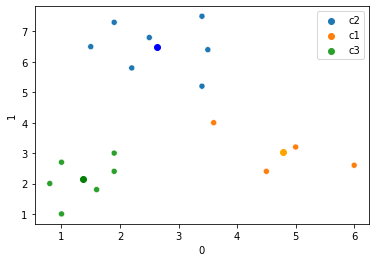

In [8]:
sns.scatterplot(X.loc[:,0],X.loc[:,1],hue=clust);

#Plot centers
plt.scatter(center2[0][0],center2[0][1], color='orange')
plt.scatter(center2[1][0],center2[1][1], color='blue')
plt.scatter(center2[2][0],center2[2][1], color='green');

## Exercício 02

class/clusters: três (setosa, versicolor, virginica)

### Dataset Iris

In [9]:
#Load the dataset
from sklearn.datasets import load_iris
iris = load_iris()
X = iris['data']
X = pd.DataFrame(np.array(X), columns=[0,1,2,3])

In [10]:
#Visualização dos dados
X.describe()

,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
#Inicializando os centros iniciais com base nas médias calculadas
center =[[5.8, 3.05, 3.75,2],[5, 2, 3, 1],[6, 4, 4, 2]]

#Distância do conjunto de pessoas para o centro c1:
dist_c1 = euclidiana_dis(X, center, 0)

#Distância do conjunto de pessoas para o centro c2:
dist_c2 = euclidiana_dis(X, center, 1)

#Distância do conjunto de pessoas para o centro c3:
dist_c3 = euclidiana_dis(X,center, 2)

#Identificando qual dos centros é menor e fazendo a clusterização dos dados:
clust = center_classification(dist_c1,dist_c2,dist_c3)
clust

#Cálculo do novo centro:
indices_c1 = [i for i, j in enumerate(clust) if j == 'c1']
indices_c2 = [i for i, j in enumerate(clust) if j == 'c2']
indices_c3 = [i for i, j in enumerate(clust) if j == 'c3']

centro1=new_center(indices_c1)
centro2=new_center(indices_c2)
centro3=new_center(indices_c3)

center2=[centro1,centro2,centro3]

#LOOP

inter=1 #count the quantity of interaction
while(center!=center2):
    #Distância do conjunto de pessoas para o centro c1:
    dist_c1 = euclidiana_dis(X, center2, 0)

    #Distância do conjunto de pessoas para o centro c2:
    dist_c2 = euclidiana_dis(X, center2, 1)

    #Distância do conjunto de pessoas para o centro c3:
    dist_c3 = euclidiana_dis(X, center2, 2)

    #Identificando qual dos centros é menor e fazendo a clusterização dos dados:
    clust = center_classification(dist_c1,dist_c2,dist_c3)

    #Cálculo do novo centro:
    indices_c1 = [i for i, j in enumerate(clust) if j == 'c1']
    indices_c2 = [i for i, j in enumerate(clust) if j == 'c2']
    indices_c3 = [i for i, j in enumerate(clust) if j == 'c3']

    center=center2

    centro1=new_center(indices_c1)
    centro2=new_center(indices_c2)
    centro3=new_center(indices_c3)

    center2 =[centro1,centro2,centro3]
    inter=inter+1 
    
print('Centers:',center2)
print('Number of interactions:',inter)

Centers: [[5.9, 2.75, 4.39, 1.43], [5.01, 3.43, 1.46, 0.25], [6.85, 3.07, 5.74, 2.07]]
Number of interactions: 5


c:\users\letic\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


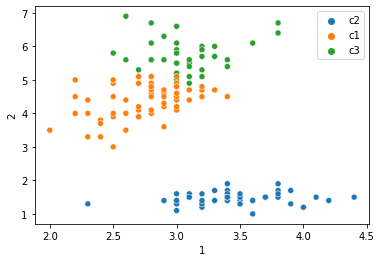

In [12]:
#Plot data Petal Length x Petal Width
sns.scatterplot(X.loc[:,1],X.loc[:,2],hue=clust);

### Dataset 02 - Wholesale customers Data Set

Source of dataset: https://archive.ics.uci.edu/ml/datasets/wholesale+customers


- Data Set Characteristics:  Multivariate
- Number of Instances: 440
- Area:Business
- Attribute Characteristics: Integer
- Number of Attributes: 8
- Associated Tasks: Classification, Clustering
- Missing Values?N/A
- Number of Web Hits: 359808

In [13]:
# Importando o dataset
X = pd.read_csv('Wholesale customers data.csv')
X.rename(columns={"Channel": 0, "Region": 1, "Fresh": 2, "Milk": 3, "Grocery": 4, "Frozen": 5,
                 "Detergents_Paper": 6,"Delicassen": 7}, inplace=True)

In [14]:
#Análise dos dados para inicializar o centro
X.describe()

,0,1,2,3,4,5,6,7
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [15]:
#Inicialização do centro de acordo com o describe
center = [[1.3,  2.5,  12000,  5796,   7951, 3071, 2881, 1524],
          [1,      2,  25000,  5000,   6000, 2000, 1000, 2000],
          [1,    2.6,   9000,  5000,   8000, 2500, 1050, 1000]]

#Distância do conjunto de pessoas para o centro c1:
dist_c1 = euclidiana_dis(X, center, 0)

#Distância do conjunto de pessoas para o centro c2:
dist_c2 = euclidiana_dis(X, center, 1)

#Distância do conjunto de pessoas para o centro c3:
dist_c3 = euclidiana_dis(X,center, 2)

#Identificando qual dos centros é menor e fazendo a clusterização dos dados:
clust = center_classification(dist_c1,dist_c2,dist_c3)
clust

#Cálculo do novo centro:
indices_c1 = [i for i, j in enumerate(clust) if j == 'c1']
indices_c2 = [i for i, j in enumerate(clust) if j == 'c2']
indices_c3 = [i for i, j in enumerate(clust) if j == 'c3']

centro1=new_center(indices_c1)
centro2=new_center(indices_c2)
centro3=new_center(indices_c3)

center2=[centro1,centro2,centro3]
#LOOP

inter=1
while(center!=center2):
    #Distância do conjunto de pessoas para o centro c1:
    dist_c1 = euclidiana_dis(X, center2, 0)

    #Distância do conjunto de pessoas para o centro c2:
    dist_c2 = euclidiana_dis(X, center2, 1)

    #Distância do conjunto de pessoas para o centro c3:
    dist_c3 = euclidiana_dis(X, center2, 2)

    #Identificando qual dos centros é menor e fazendo a clusterização dos dados:
    clust = center_classification(dist_c1,dist_c2,dist_c3)

    #Cálculo do novo centro:
    indices_c1 = [i for i, j in enumerate(clust) if j == 'c1']
    indices_c2 = [i for i, j in enumerate(clust) if j == 'c2']
    indices_c3 = [i for i, j in enumerate(clust) if j == 'c3']

    center=center2

    centro1=new_center(indices_c1)
    centro2=new_center(indices_c2)
    centro3=new_center(indices_c3)

    center2 =[centro1,centro2,centro3]
    inter=inter+1
    
print('Centers:')
for i in center2:
    print(i)
print('\n')
print('Number of interactions:',inter)
print('\n')
#print('Dados classificados:\n',clust)

Centers:
[1.96, 2.47, 7751.98, 17910.51, 27037.91, 1970.94, 12104.87, 2185.74]
[1.13, 2.57, 35941.4, 6044.45, 6288.62, 6713.97, 1039.67, 3049.47]
[1.25, 2.55, 8296.0, 3787.26, 5162.8, 2582.12, 1724.52, 1138.02]


Number of interactions: 11




c:\users\letic\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


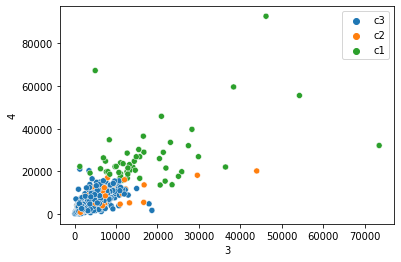

In [16]:
#"Milk": 3 x "Grocery": 4
sns.scatterplot(X.loc[:,3],X.loc[:,4],hue=clust);

### Dataset 03 - Wine dataset 

Source of dataset: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html

- Classes  - 3
- Samples per class [59,71,48]
- Samples total 178
- Dimensionality 13
- Features real, positive

The number of classes is 03 so I'll consider three clusters k=3.

In [17]:
#Import dataset
from sklearn.datasets import load_wine
wine = load_wine()
X = wine['data']

X = pd.DataFrame(np.array(X), columns=[0,1,2,3,4,5,6,7,8,9,10,11,12])

In [18]:
#Análise dos dados para inicializar o centro
X.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [19]:
#Inicialização dos centros
center = [[12,     2,   2,  19, 10,  2,  0.1,  4,1,  6,  0.8,  2,  728],
          [13,     1,   1,  18,  9,  1,  0.2,  3,1,  5,  1,    2,  130],
          [12.5, 2.5, 2.3,  20,  9,  1,  0.2,  3,1,  5,  0.9,  2,  500]]
#Distância do conjunto de pessoas para o centro c1:
dist_c1 = euclidiana_dis(X, center, 0)

#Distância do conjunto de pessoas para o centro c2:
dist_c2 = euclidiana_dis(X, center, 1)

#Distância do conjunto de pessoas para o centro c3:
dist_c3 = euclidiana_dis(X,center, 2)


#Identificando qual dos centros é menor e fazendo a clusterização dos dados:
clust = center_classification(dist_c1,dist_c2,dist_c3)
clust

#Cálculo do novo centro:
indices_c1 = [i for i, j in enumerate(clust) if j == 'c1']
indices_c2 = [i for i, j in enumerate(clust) if j == 'c2']
indices_c3 = [i for i, j in enumerate(clust) if j == 'c3']

centro1=new_center(indices_c1)
centro2=new_center(indices_c2)
centro3=new_center(indices_c3)

center2=[centro1,centro2,centro3]
#LOOP

inter=1
for i in range(100): #testei com outros valores e vi que 100 iterações garante que a convergência foi atingida
    #Distância do conjunto de pessoas para o centro c1:
    dist_c1 = euclidiana_dis(X, center2, 0)

    #Distância do conjunto de pessoas para o centro c2:
    dist_c2 = euclidiana_dis(X, center2, 1)

    #Distância do conjunto de pessoas para o centro c3:
    dist_c3 = euclidiana_dis(X, center2, 2)

    #Identificando qual dos centros é menor e fazendo a clusterização dos dados:
    clust = center_classification(dist_c1,dist_c2,dist_c3)

    #Cálculo do novo centro:
    indices_c1 = [i for i, j in enumerate(clust) if j == 'c1']
    indices_c2 = [i for i, j in enumerate(clust) if j == 'c2']
    indices_c3 = [i for i, j in enumerate(clust) if j == 'c3']

    center=center2

    centro1=new_center(indices_c1)
    centro2=new_center(indices_c2)
    centro3=new_center(indices_c3)

    center2 =[centro1,centro2,centro3]
    inter=inter+1
    
print('Centers:')
for i in center2:
    print(i)
print('\n')
print('Number of interactions:',inter)
print('\n')
#print('Dados classificados:\n',clust)

Centers:
[13.8, 1.88, 2.43, 17.02, 105.51, 2.87, 3.01, 0.29, 1.91, 5.7, 1.08, 3.11, 1195.15]
[12.52, 2.49, 2.29, 20.82, 92.35, 2.07, 1.76, 0.39, 1.45, 4.09, 0.94, 2.49, 458.23]
[12.93, 2.5, 2.41, 19.89, 103.6, 2.11, 1.58, 0.39, 1.5, 5.65, 0.88, 2.37, 728.34]


Number of interactions: 101


